In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from prettytable import PrettyTable

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/live cirrhosis dataset/Indian Liver Patient Dataset (ILPD).csv')

In [ ]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

**EDA**





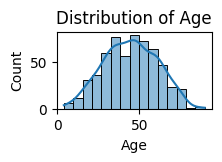

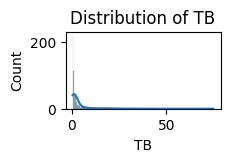

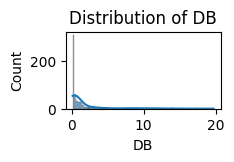

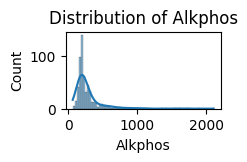

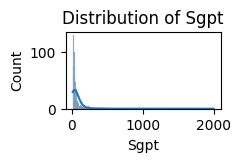

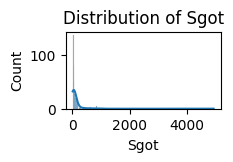

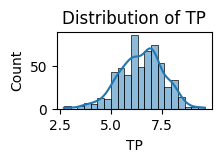

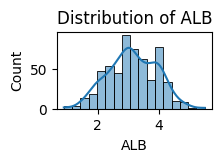

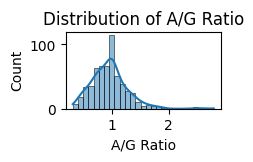

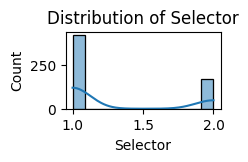

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(2, 1))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

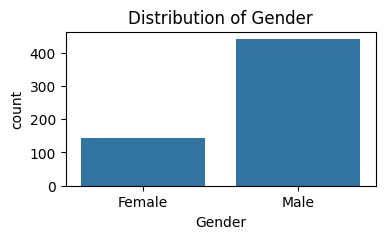

In [ ]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

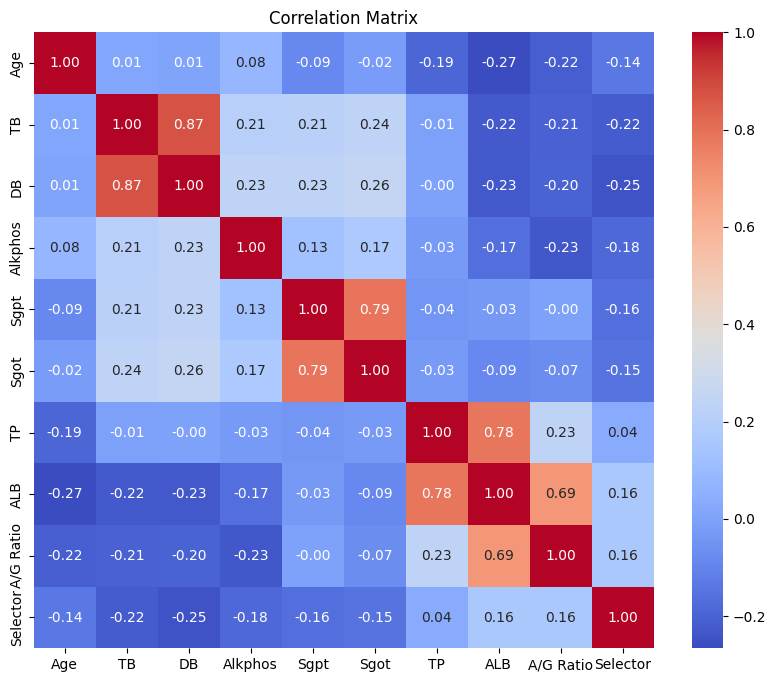

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Replace missing values in A/G Ratio with the corresponding ALB values (high correlation)**

In [ ]:
non_null_df = df.dropna(subset=['ALB', 'A/G Ratio'])

# Calculate the correlation between 'ALB' and 'A/G Ratio'
correlation = non_null_df['ALB'].corr(non_null_df['A/G Ratio'])

def fill_agr_missing(row):
    if pd.isnull(row['A/G Ratio']):
        return row['ALB'] * correlation
    return row['A/G Ratio']


df['A/G Ratio'] = df.apply(fill_agr_missing, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


**Smote resampling for class imbalance**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


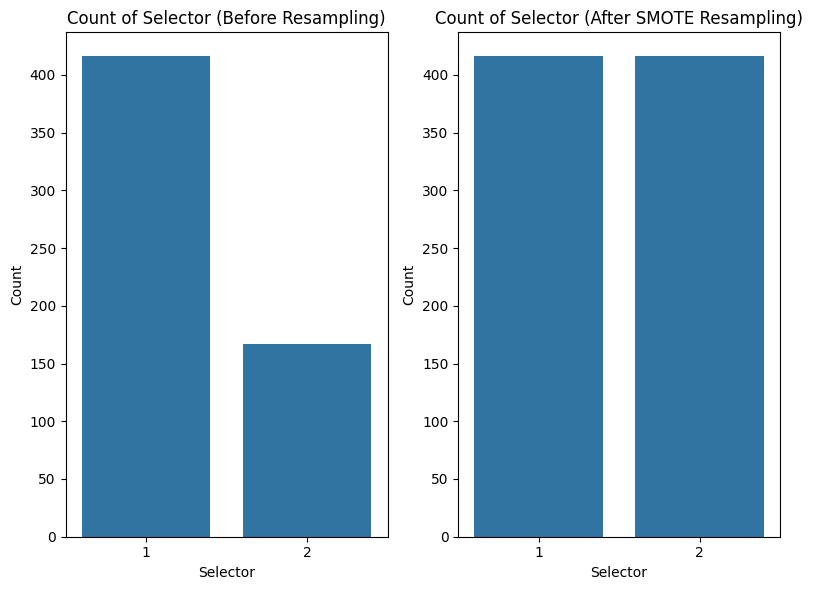

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(['Selector'], axis=1)
y = df['Selector']

encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X.drop('Gender', axis=1), pd.DataFrame(encoder.fit_transform(X[['Gender']]))], axis=1)

X_encoded.columns = X_encoded.columns.astype(str)

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Selector', data=df)
plt.title('Count of Selector (Before Resampling)')
plt.xlabel('Selector')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Count of Selector (After SMOTE Resampling)')
plt.xlabel('Selector')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(classification_report_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

Logistic Regression Metrics:
Accuracy: 0.7784431137724551
Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.64      0.72        75
           2       0.75      0.89      0.82        92

    accuracy                           0.78       167
   macro avg       0.79      0.77      0.77       167
weighted avg       0.79      0.78      0.77       167

Confusion Matrix:
[[48 27]
 [10 82]]


**SVM**

In [ ]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("\nSVM Metrics:")
print(f'Accuracy: {accuracy_svm}')
print('Classification Report:')
print(classification_report_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)


SVM Metrics:
Accuracy: 0.6946107784431138
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.53      0.61        75
           2       0.68      0.83      0.75        92

    accuracy                           0.69       167
   macro avg       0.70      0.68      0.68       167
weighted avg       0.70      0.69      0.69       167

Confusion Matrix:
[[40 35]
 [16 76]]


**Random Forest**

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_report_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)


Random Forest Metrics:
Accuracy: 0.8323353293413174
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        75
           2       0.86      0.83      0.84        92

    accuracy                           0.83       167
   macro avg       0.83      0.83      0.83       167
weighted avg       0.83      0.83      0.83       167

Confusion Matrix:
[[63 12]
 [16 76]]


In [ ]:

report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
precision_lr = report_lr['weighted avg']['precision']
recall_lr = report_lr['weighted avg']['recall']
f1_lr = report_lr['weighted avg']['f1-score']

report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
precision_svm = report_svm['weighted avg']['precision']
recall_svm = report_svm['weighted avg']['recall']
f1_svm = report_svm['weighted avg']['f1-score']

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
precision_rf = report_rf['weighted avg']['precision']
recall_rf = report_rf['weighted avg']['recall']
f1_rf = report_rf['weighted avg']['f1-score']


table = PrettyTable()


table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

table.add_row(["Logistic Regression", f'\033[91m{accuracy_lr:.2f}\033[0m', f'\033[91m{precision_lr:.2f}\033[0m', f'\033[92m{recall_lr:.2f}\033[0m', f'\033[94m{f1_lr:.2f}\033[0m'])
table.add_row(["SVM", f'\033[91m{accuracy_svm:.2f}\033[0m', f'\033[91m{precision_svm:.2f}\033[0m', f'\033[92m{recall_svm:.2f}\033[0m', f'\033[94m{f1_svm:.2f}\033[0m'])
table.add_row(["Random Forest", f'\033[91m{accuracy_rf:.2f}\033[0m', f'\033[91m{precision_rf:.2f}\033[0m', f'\033[92m{recall_rf:.2f}\033[0m', f'\033[94m{f1_rf:.2f}\033[0m'])

for field in table.field_names[1:]:
    table.align[field] = "center"

print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |   0.78   |    0.79   |  0.78  |   0.77   |
|         SVM         |   0.69   |    0.70   |  0.69  |   0.69   |
|    Random Forest    |   0.83   |    0.83   |  0.83  |   0.83   |
+---------------------+----------+-----------+--------+----------+
